In [1]:
from datetime import datetime
from datetime import timezone

import pytz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
import geopandas as gpd

from helpers import read_csv_as_pd_df, preprocess_spain_fuel_price_df

SEABORN_PALETTE = "colorblind"
SEABORN_FIGURE_FIGSIZE = (12, 10)

sns.set_palette(SEABORN_PALETTE)
sns.set(rc={"figure.figsize": SEABORN_FIGURE_FIGSIZE})

In [2]:
BUCKET = "spain-fuel-prices"
MADRID_DISTRICTS_GEOJSON = "../maps/distritos-madrid.geojson"

LABEL_LIST = ["repsol", "cepsa", "bp", "shell", "galp", "disa", "ballenoil", "carrefour", "plenoil", "petroprix", "costco"]
columns = [
    "timestamp",
    "zip_code",
    "eess_id",
    "ccaa_id",
    "municipality_id",
    "province_id",
    "sale_type",
    "label",
    "address",
    "municipality",
    "province",
    "locality",
    "latitude",
    "longitude",
    "biodiesel_price",
    "bioethanol_price",
    "compressed_natural_gas_price",
    "liquefied_natural_gas_price",
    "liquefied_petroleum_gases_price",
    "diesel_a_price",
    "diesel_b_price",
    "diesel_premium_price",
    "gasoline_95_e10_price",
    "gasoline_95_e5_price",
    "gasoline_95_e5_premium_price",
    "gasoline_98_e10_price",
    "gasoline_98_e5_price",
    "hydrogen_price",
]

# Load Spain Fuel Prices Dataset from GCP Storage

In [3]:
df = read_csv_as_pd_df(BUCKET)
df = preprocess_spain_fuel_price_df(df, LABEL_LIST)

Reading spain_fuel_prices_2024-10-11T11:50:49.486761.csv
Dropping Date column from spain_fuel_prices_2024-10-11T11:50:49.486761.csv
Reading spain_fuel_prices_2024-10-12T10:03:27.045933.csv
Dropping Date column from spain_fuel_prices_2024-10-12T10:03:27.045933.csv
Reading spain_fuel_prices_2024-10-13T10:05:07.csv
Reading spain_fuel_prices_2024-10-14T10:02:20.csv
Reading spain_fuel_prices_2024-10-15T10:02:20.csv
Reading spain_fuel_prices_2024-10-16T10:02:21.csv
Reading spain_fuel_prices_2024-10-17T10:02:20.csv
Reading spain_fuel_prices_2024-10-18T10:02:22.csv
Reading spain_fuel_prices_2024-10-19T10:02:21.csv
Reading spain_fuel_prices_2024-10-20T10:02:22.csv
Reading spain_fuel_prices_2024-10-21T10:02:22.csv
Reading spain_fuel_prices_2024-10-22T10:02:19.csv
Reading spain_fuel_prices_2024-10-23T10:02:21.csv
Reading spain_fuel_prices_2024-10-24T10:02:22.csv
Reading spain_fuel_prices_2024-10-25T10:02:17.csv
Reading spain_fuel_prices_2024-10-26T10:02:21.csv
Reading spain_fuel_prices_2024-10-27

In [4]:
df.shape

(964554, 29)

In [5]:
madrid_df = df[df["province"] == "madrid"]

In [6]:
madrid_df.shape

(70263, 29)

In [7]:
max_date = max(madrid_df["date"])

# Load MadridAdministrative District GeoJSON

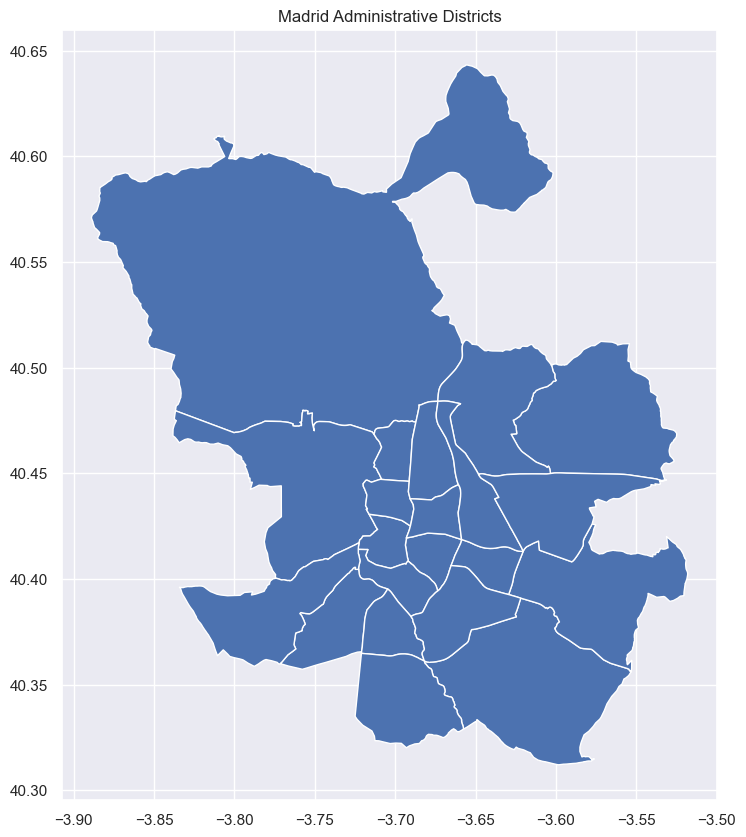

In [8]:
madrid_districts = gpd.read_file(MADRID_DISTRICTS_GEOJSON)
madrid_districts.plot()
plt.title("Madrid Administrative Districts")
plt.show()

# Join them together

In [9]:
# Convert lat/long to Points and create a GeoDataFrame
madrid_df["geometry"] = madrid_df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)
madrid_gdf = gpd.GeoDataFrame(madrid_df, geometry="geometry", crs="EPSG:4326")

/var/folders/pv/gq2q0j5501v74jwmrjfbkr240000gn/T/ipykernel_10657/1277046040.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  madrid_df["geometry"] = madrid_df.apply(lambda row: Point(row["longitude"], row["latitude"]), axis=1)


## Verify Latitude and Logitude

In [10]:
import pandas as pd

# Define acceptable latitude and longitude ranges for Spain
min_latitude, max_latitude = 36.0, 43.0
min_longitude, max_longitude = -9.0, 4.0

# Check for any latitude or longitude values outside these ranges
invalid_coords = madrid_df[
    (df["latitude"] < min_latitude) | (df["latitude"] > max_latitude) |
    (df["longitude"] < min_longitude) | (df["longitude"] > max_longitude)
]

print("Rows with invalid latitude or longitude values:")
print(invalid_coords.shape)
invalid_coords[["timestamp", "zip_code", "label", "address", "municipality", "province", "locality", "latitude", "longitude"]]

Rows with invalid latitude or longitude values:
(79, 30)


/var/folders/pv/gq2q0j5501v74jwmrjfbkr240000gn/T/ipykernel_10657/2246876157.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  invalid_coords = madrid_df[


,timestamp,zip_code,label,address,municipality,province,locality,latitude,longitude
7395,2024-10-11 09:51:07+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0
19386,2024-10-12 10:02:41+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0
31368,2024-10-13 10:02:42+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0
43360,2024-10-14 10:02:40+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0
55368,2024-10-15 10:02:41+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0
...,...,...,...,...,...,...,...,...,...
912885,2024-12-26 11:02:11+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0
924680,2024-12-27 11:02:11+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0
936474,2024-12-28 11:02:12+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0
948267,2024-12-29 11:02:15+00:00,28340,super gasoil,"avenida andalucia de, 519",valdemoro,madrid,valdemoro,0.0,0.0


In [11]:
madrid_gdf = madrid_gdf[
    (madrid_gdf["latitude"] >= min_latitude) & (madrid_gdf["latitude"] <= max_latitude) &
    (madrid_gdf["longitude"] >= min_longitude) & (madrid_gdf["longitude"] <= max_longitude)
]

assert madrid_gdf.shape[0] + invalid_coords.shape[0] == madrid_df.shape[0]

In [12]:
# Spatial join to label gas stations with their administrative district
madrid_fuel_price_with_districts = gpd.sjoin(madrid_gdf, madrid_districts, how="left", predicate="within")

# Average Gasoline Prices by Admin. District in Madrid

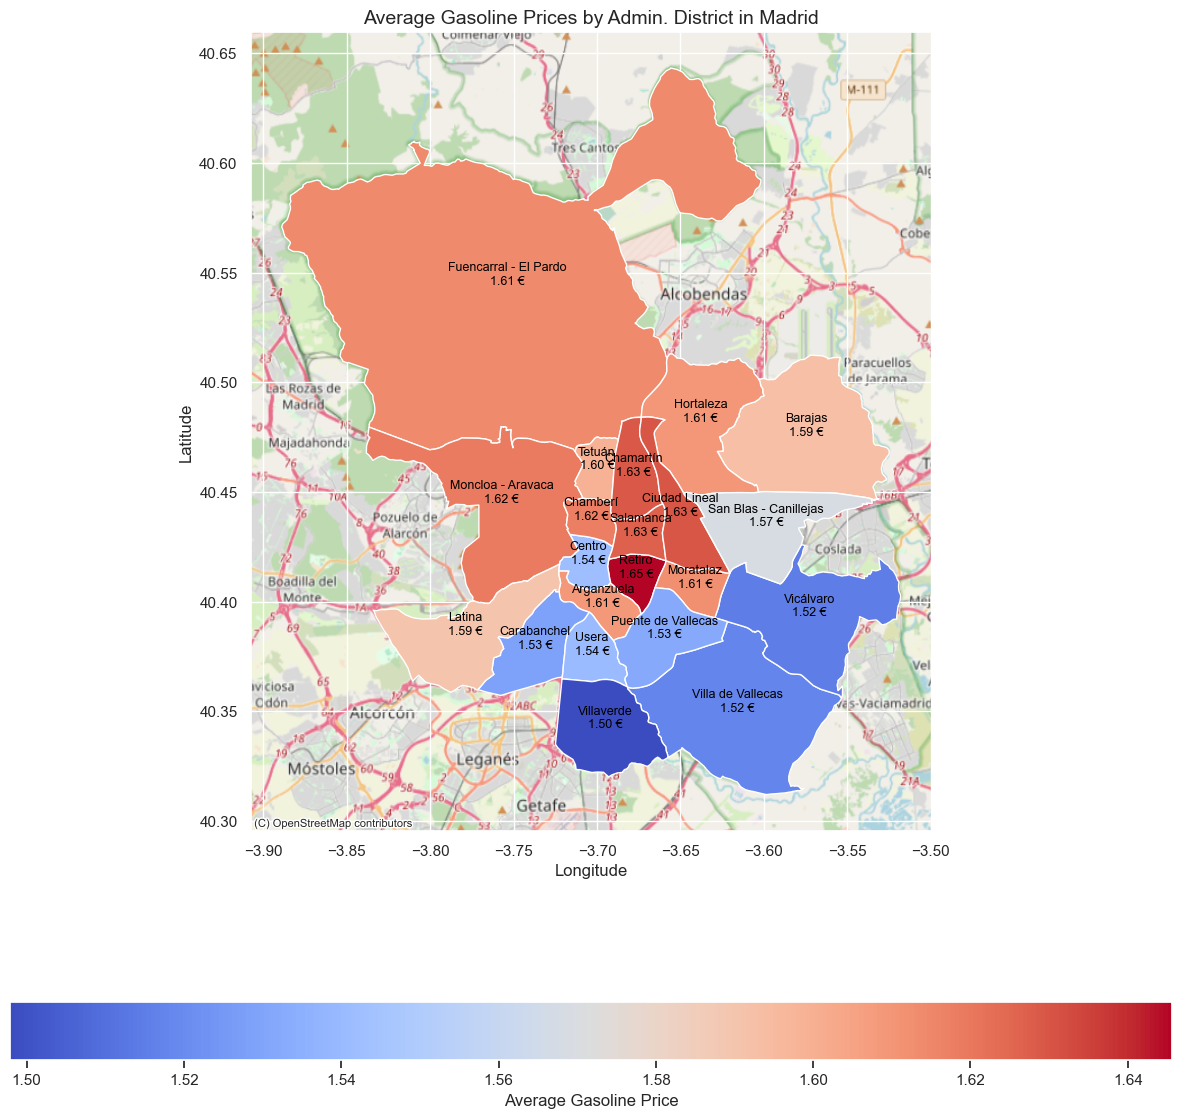

In [13]:
average_price_per_district = madrid_fuel_price_with_districts[
    madrid_fuel_price_with_districts["date"] == max_date
].groupby("nombre")["gasoline_95_e5_price"].mean().reset_index()

districts_gdf = madrid_districts.merge(average_price_per_district, left_on="nombre", right_on="nombre", how="left")

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
districts_gdf.plot(
    column="gasoline_95_e5_price", cmap="coolwarm", legend=True, ax=ax,
    legend_kwds={"label": "Average Gasoline Price", "orientation": "horizontal"}
)

import contextily as ctx  # For basemap
ctx.add_basemap(ax, crs=districts_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

for idx, row in districts_gdf.iterrows():
    centroid = row["geometry"].centroid
    label = f"{row['nombre']}\n{row['gasoline_95_e5_price']:.2f} €"
    ax.text(centroid.x, centroid.y, label, ha="center", fontsize=9, color="black") #, weight="bold")

# Set title and labels
plt.title("Average Gasoline Prices by Admin. District in Madrid", fontdict={"fontsize": 14})
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()

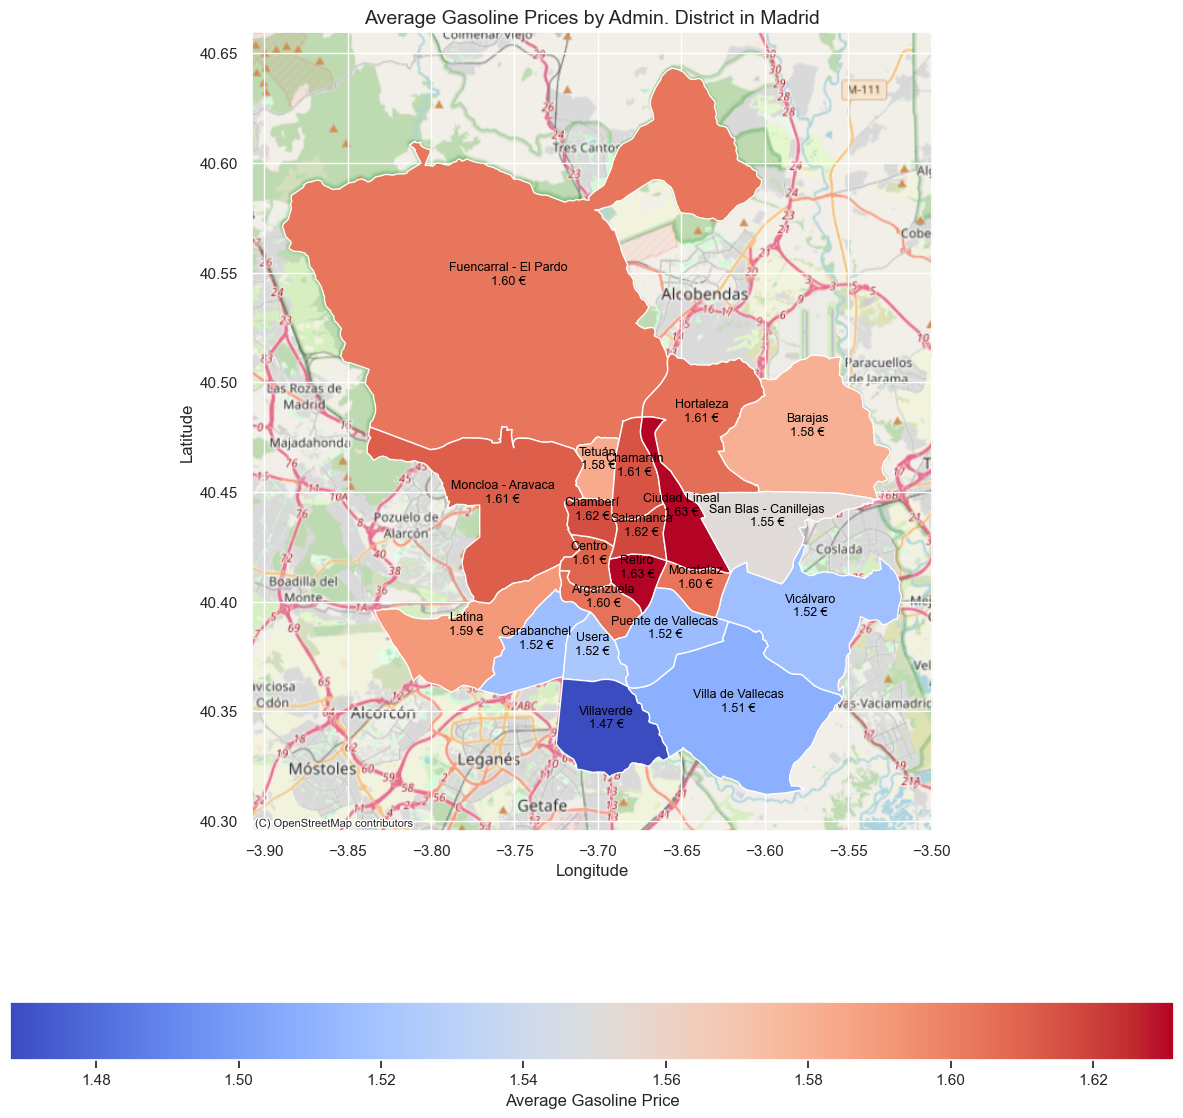

In [14]:
average_price_per_district = madrid_fuel_price_with_districts.groupby("nombre")["gasoline_95_e5_price"].mean().reset_index()

districts_gdf = madrid_districts.merge(average_price_per_district, left_on="nombre", right_on="nombre", how="left")

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
districts_gdf.plot(
    column="gasoline_95_e5_price", cmap="coolwarm", legend=True, ax=ax,
    legend_kwds={"label": "Average Gasoline Price", "orientation": "horizontal"}
)

import contextily as ctx  # For basemap
ctx.add_basemap(ax, crs=districts_gdf.crs.to_string(), source=ctx.providers.OpenStreetMap.Mapnik)

for idx, row in districts_gdf.iterrows():
    centroid = row["geometry"].centroid
    label = f"{row['nombre']}\n{row['gasoline_95_e5_price']:.2f} €"
    ax.text(centroid.x, centroid.y, label, ha="center", fontsize=9, color="black") #, weight="bold")

# Set title and labels
plt.title("Average Gasoline Prices by Admin. District in Madrid", fontdict={"fontsize": 14})
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.tight_layout()

# Folium

In [15]:
import folium
from folium.features import GeoJsonTooltip

import geopandas as gpd

# Create the map centered on Madrid
m = folium.Map(location=[40.4168, -3.7038], zoom_start=11)

# Define the Choropleth layer with the corrected column names
choropleth = folium.Choropleth(
    geo_data=MADRID_DISTRICTS_GEOJSON,  # Path to your GeoJSON file
    data=districts_gdf,
    columns=["nombre", "gasoline_95_e5_price"],  # Update to use "nombre" and "gasoline_95_e5_price"
    key_on="feature.properties.nombre",  # Match "nombre" in the GeoJSON properties
    fill_color="RdYlBu_r",  # Reversed blue-red color scheme
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average Gasoline Price (€)"
).add_to(m)

# Add tooltips to display district name and average gasoline price
tooltip = GeoJsonTooltip(
    fields=["nombre", ],  # Ensure these match your DataFrame columns
    aliases=["District:", ],
    localize=True,
    sticky=False,
    labels=True,
    style=("background-color: white; color: black; font-family: Arial; font-size: 12px; padding: 5px;")
)

# Attach tooltips to each district in the Choropleth
choropleth.geojson.add_child(tooltip)
m.save("madrid_gasoline_prices_map_interactive.html")

In [16]:
m

# Avg Price Flutuation per Distric

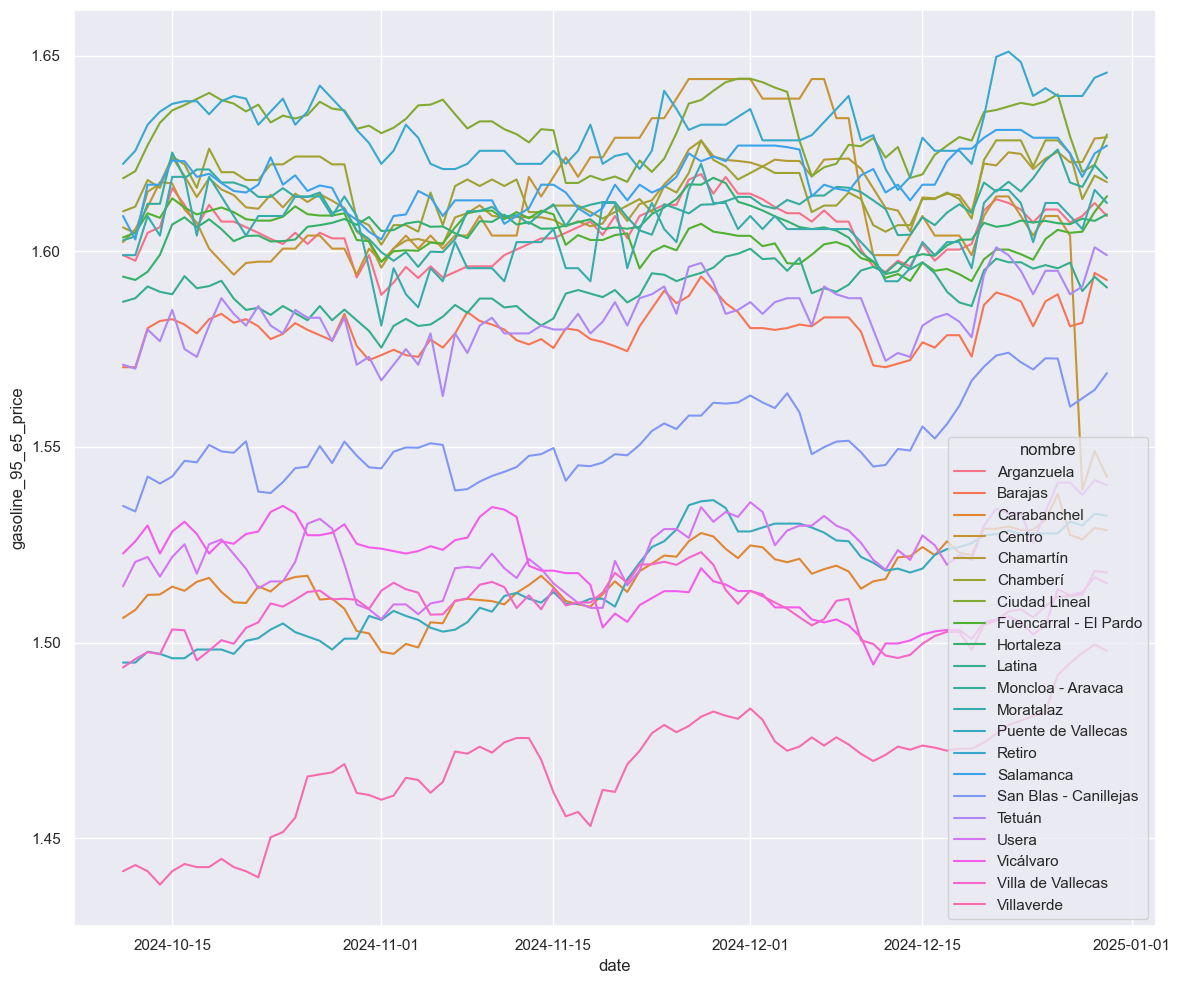

In [17]:
sns.lineplot(
    data=madrid_fuel_price_with_districts.groupby(["date", "nombre"])["gasoline_95_e5_price"].mean().reset_index(),
    x="date",
    y="gasoline_95_e5_price",
    hue="nombre",
)
plt.tight_layout()

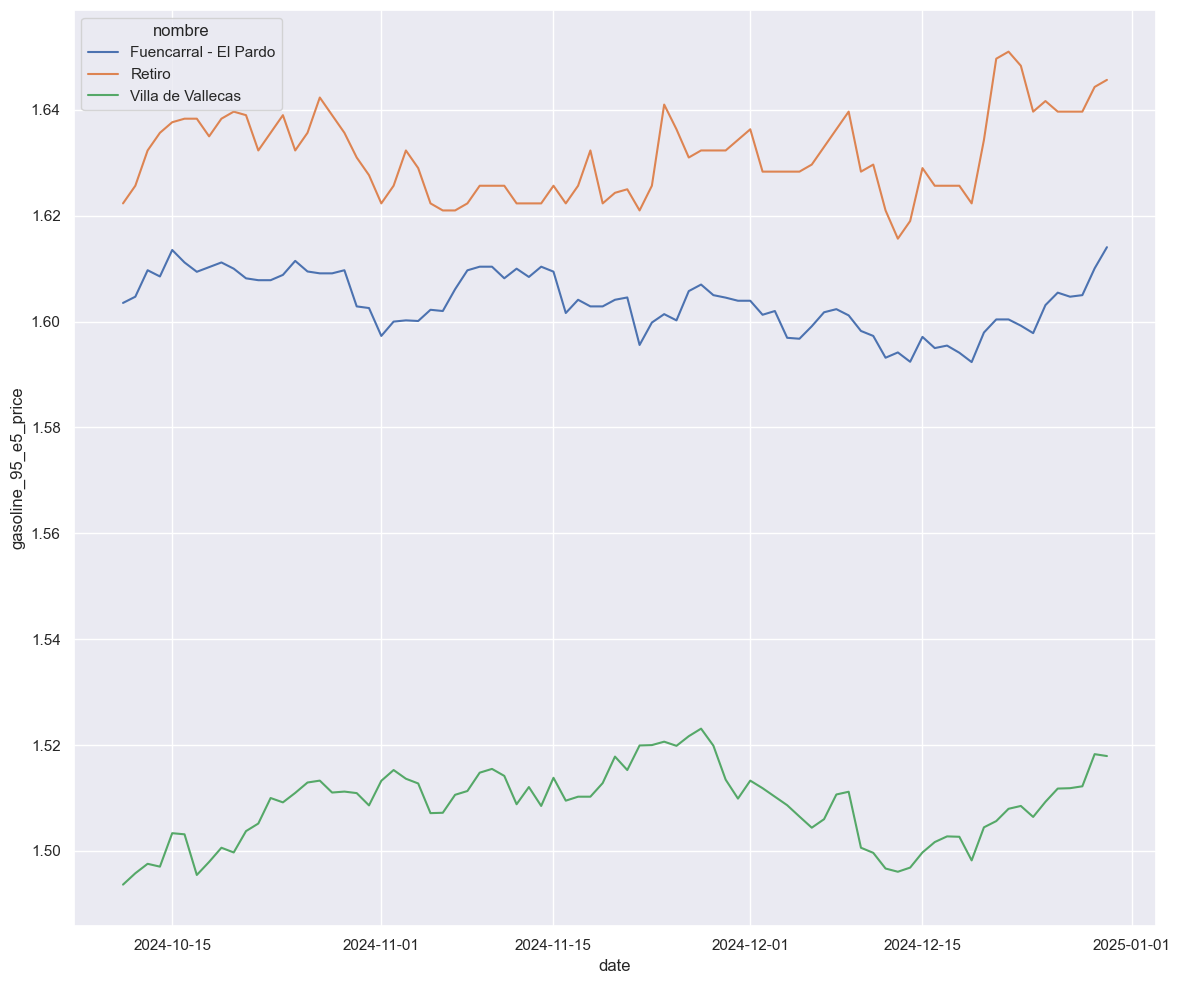

In [18]:
to_plot = madrid_fuel_price_with_districts.groupby(["date", "nombre"])["gasoline_95_e5_price"].mean().reset_index()
sns.lineplot(
    data=to_plot[to_plot["nombre"].isin(["Fuencarral - El Pardo", "Villa de Vallecas", "Retiro"])],
    x="date",
    y="gasoline_95_e5_price",
    hue="nombre",
)
plt.tight_layout()